In [1]:
import pandas as pd
import os

# API Wrappers

## Dealing with `keys` in code

Usually, when you access an API, you'll use some password or `key`. 

There's a package called `dotenv` that helps you hide your keys inside a file.

- Install dotenv `!pip install dotenv` (or `!pip install python-dotenv`)
- Create a file with a `.env` extension and variables inside of it like 
```
API_KEY="l1noPOPAixCPM"
API_SECRET="GraGq0zrGhs1qvbA0xQXsZBKuTkK5MJ"
```
- run dotenv.load_dotenv('filename.env')
- now if you run os.getenv('API_KEY'), it will contain the string 'l1noPOPAixCPM'
- the idea is that you can upload your code to Github and **DON'T** upload the `.env` file

In [ ]:
!pip3 install python-dotenv

In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv('credentials/credentials.env')

True

In [5]:
print(os.getenv('API_KEY'))

l1noPOPAixCPM


## List of API wrappers

- This is a list of some known python packages that facilitates the use of some APIs:
https://github.com/realpython/list-of-python-api-wrappers

- But there are much more than that. You just have to look for it. Here's a list of some public APIs grouped by type: https://github.com/public-apis/public-apis. Maybe you can find an API wrapper for those too. You just need to search google something like: `name_of_the_api python wrapper`

- API para o `Portal da Transparência` (Brasil): http://www.transparencia.gov.br/swagger-ui.html

- Here's another list of fun APIs: https://apilist.fun/


# Use Cases

## OMDB

http://www.omdbapi.com/

https://github.com/dgilland/omdb.py

Install API wrapper: `!pip install omdb`


In [ ]:
!pip install omdb

In [6]:
from omdb import OMDBClient

In [7]:
load_dotenv('credentials/key_omdb.env')
chave_ombdb = os.getenv('OMDB_KEY')
client = OMDBClient(apikey=chave_ombdb)

In [24]:
print(os.getenv('OMDB_KEY'))

dfe4d974


In [14]:
results = client.title('Alien')

In [15]:
results

{'title': 'Alien',
 'year': '1979',
 'rated': 'R',
 'released': '22 Jun 1979',
 'runtime': '117 min',
 'genre': 'Horror, Sci-Fi',
 'director': 'Ridley Scott',
 'writer': "Dan O'Bannon, Ronald Shusett",
 'actors': 'Sigourney Weaver, Tom Skerritt, John Hurt',
 'plot': 'After a space merchant vessel receives an unknown transmission as a distress call, one of the crew is attacked by a mysterious life form and they soon realize that its life cycle has merely begun.',
 'language': 'English',
 'country': 'United Kingdom, United States',
 'awards': 'Won 1 Oscar. 18 wins & 22 nominations total',
 'poster': 'https://m.media-amazon.com/images/M/MV5BMmQ2MmU3NzktZjAxOC00ZDZhLTk4YzEtMDMyMzcxY2IwMDAyXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '8.4/10'},
  {'source': 'Rotten Tomatoes', 'value': '98%'},
  {'source': 'Metacritic', 'value': '89/100'}],
 'metascore': '89',
 'imdb_rating': '8.4',
 'imdb_votes': '835,336',
 'imdb_id': 'tt0078748',

In [16]:
results['poster']

'https://m.media-amazon.com/images/M/MV5BMmQ2MmU3NzktZjAxOC00ZDZhLTk4YzEtMDMyMzcxY2IwMDAyXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg'

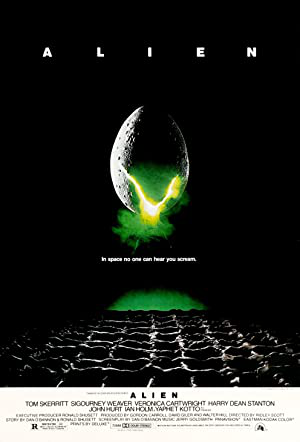

In [17]:
import requests
from PIL import Image

response = requests.get(results['poster'], stream=True)
Image.open(response.raw)

In [18]:
tb_top_movies = pd.read_csv('data/top_gross_ltv.csv', sep = ";", decimal = ",")

In [19]:
tb_top_movies

,movie_name,adj_gross_ltv
0,Gone with the Wind,1850581586
1,Star Wars: Episode IV - A New Hope,1629496559
2,The Sound of Music,1303502105
3,E.T. the Extra-Terrestrial,1297730421
4,Titanic,1240054754
...,...,...
195,Patton,364456792
196,Fatal Attraction,363012270
197,Iron Man 2,362898831
198,Zootopia,362329805


In [20]:
top_movies = list(tb_top_movies['movie_name'])
print(len(top_movies))
print(top_movies[0:5])

200
['Gone with the Wind', 'Star Wars: Episode IV - A New Hope', 'The Sound of Music', 'E.T. the Extra-Terrestrial', 'Titanic']


In [21]:
top_movies[0]

'Gone with the Wind'

In [22]:
results = client.title(top_movies[0])

In [23]:
results

{'title': 'Gone with the Wind',
 'year': '1939',
 'rated': 'Passed',
 'released': '17 Jan 1940',
 'runtime': '238 min',
 'genre': 'Drama, History, Romance',
 'director': 'Victor Fleming, George Cukor, Sam Wood',
 'writer': 'Margaret Mitchell, Sidney Howard, Oliver H.P. Garrett',
 'actors': 'Clark Gable, Vivien Leigh, Thomas Mitchell',
 'plot': 'The manipulative daughter of a Georgia plantation owner conducts a turbulent romance with a roguish profiteer during the American Civil War and Reconstruction periods.',
 'language': 'English',
 'country': 'United States',
 'awards': 'Won 10 Oscars. 21 wins & 12 nominations total',
 'poster': 'https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg',
 'ratings': [{'source': 'Internet Movie Database', 'value': '8.1/10'},
  {'source': 'Rotten Tomatoes', 'value': '90%'},
  {'source': 'Metacritic', 'value': '97/100'}],
 'metascore': '97',
 'imdb_rating': '8.1',
 'imdb_votes':

In [35]:
# Criar um DataFrame com os dados abaixo para os 100 maiores:
# - NOME DO FILME (STRING)
# - ANO DE LANÇAMENTO (INTEGER)
# - NOTA NO IMDB (FLOAT)
# - NOTA NO ROTTEN TOMATOES (FLOAT)
# - DURAÇÃO EM MINUTOS (INTEGER)
import re
nomes = []
anos = []
notas = []
notas_rt = []
durs = []
for nome_filme in top_movies:
    nome = nome_filme
    resultado_api = client.title(nome_filme)
    ano_de_lanc = int(resultado_api['year'])
    nota_imdb = float(resultado_api['imdb_rating'])
    
    nota_rt = -1
    for rating in resultado_api['ratings']:
        if rating['source'] == 'Rotten Tomatoes':
            nota_rt = float(re.sub('%', '', rating['value']))

    dur_filme = re.findall('[0-9]+', resultado_api['runtime'])[0]
    nomes.append(nome)
    anos.append(ano_de_lanc)
    notas.append(nota_imdb)
    notas_rt.append(nota_rt)
    durs.append(dur_filme)

df = pd.DataFrame({'nomes' : nomes, 'anos' : anos, 'imdb' : notas, 'rt' : notas_rt, 'duracao' : durs})

In [36]:
df.describe()

,anos,imdb,rt
count,200.000000,200.000000,200.000000
mean,1990.110000,7.450500,79.185000
std,21.868219,0.711993,19.992732
min,1921.000000,5.400000,-1.000000
25%,1974.000000,7.000000,72.000000
50%,1995.000000,7.400000,85.500000
75%,2008.000000,8.000000,93.000000
max,2019.000000,9.200000,100.000000


In [37]:
resultado_api = client.title(top_movies[0])
resultado_api['ratings'][0]

{'source': 'Internet Movie Database', 'value': '8.1/10'}

## Spotify

Install spotipy: `pip install spotipy`

Read its documentation: https://spotipy.readthedocs.io/en/2.17.1/

If you read the documentation, it tells you to get your `access key` at https://developer.spotify.com/documentation/web-api/. You can view the `quick-start` tab or follow the guidelines here.

- Click on `Dashboard`
- Log in to your Spotify account
- Create an APP
- Collect your `Client ID` and `Client Secret` (click on SHOW CLIENT SECRET)
- Click on `Edit Settings` on your app's dashboard
    - You have to insert a `redirect_uri` (I've put: https://www.google.com. You can put anything.)
- Find your username ID in your profile settings.


- Code Samples: https://github.com/plamere/spotipy/tree/master/examples

In [74]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [38]:
load_dotenv('credentials/key_spotify.env')

True

In [73]:
print(os.getenv('CLIENT_ID'))

cd9cd1ff2710474993b146e14b5e2612


In [40]:
from spotipy import util, oauth2, Spotify

### Authentication 

In [108]:
gerente_aute = oauth2.SpotifyClientCredentials(client_id=os.getenv('CLIENT_ID'), client_secret=os.getenv('CLIENT_SECRET'))
client = Spotify(auth_manager = gerente_aute)

In [ ]:
# client_id=os.getenv('CLIENT_ID'), client_secret=os.getenv('CLIENT_SECRET')
# oauth2.SpotifyClientCredentials(client_id, client_secret)
# Spotify(auth_manager)

In [42]:
client

### Get Audio Features

In [44]:
client.audio_features('6hHc7Pks7wtBIWb8Z6A0iFq')

[{'danceability': 0.762,
  'energy': 0.651,
  'key': 0,
  'loudness': -13.34,
  'mode': 1,
  'speechiness': 0.0655,
  'acousticness': 0.00198,
  'instrumentalness': 0.856,
  'liveness': 0.111,
  'valence': 0.941,
  'tempo': 130.395,
  'type': 'audio_features',
  'id': '6hHc7Pks7wtBIW8Z6A0iFq',
  'uri': 'spotify:track:6hHc7Pks7wtBIW8Z6A0iFq',
  'track_href': 'https://api.spotify.com/v1/tracks/6hHc7Pks7wtBIW8Z6A0iFq',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6hHc7Pks7wtBIW8Z6A0iFq',
  'duration_ms': 449160,
  'time_signature': 4}]

In [46]:
client.audio_features(['https://open.spotify.com/track/4vy2YnIiU37OB7BonhYWgZ?si=c9f97bf9a6494803',
                                    'https://open.spotify.com/track/5P9qFmIiMqE6r2UfwVIdIZ?si=4b95ccef589d4924',
                                    'https://open.spotify.com/track/7oGwKNBX90dXL53ZbhPxJk?si=8bb44916119a413a',
                                    'https://open.spotify.com/track/3u4jdEDB2WmOBIxxpzq44f?si=471e5e610d8646f4'])

[{'danceability': 0.357,
  'energy': 0.565,
  'key': 8,
  'loudness': -9.915,
  'mode': 0,
  'speechiness': 0.0419,
  'acousticness': 0.216,
  'instrumentalness': 0.835,
  'liveness': 0.98,
  'valence': 0.218,
  'tempo': 158.032,
  'type': 'audio_features',
  'id': '4vy2YnIiU37OB7BonhYWgZ',
  'uri': 'spotify:track:4vy2YnIiU37OB7BonhYWgZ',
  'track_href': 'https://api.spotify.com/v1/tracks/4vy2YnIiU37OB7BonhYWgZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4vy2YnIiU37OB7BonhYWgZ',
  'duration_ms': 758360,
  'time_signature': 4},
 {'danceability': 0.624,
  'energy': 0.597,
  'key': 0,
  'loudness': -10.542,
  'mode': 1,
  'speechiness': 0.049,
  'acousticness': 0.0992,
  'instrumentalness': 0.778,
  'liveness': 0.108,
  'valence': 0.084,
  'tempo': 119.964,
  'type': 'audio_features',
  'id': '5P9qFmIiMqE6r2UfwVIdIZ',
  'uri': 'spotify:track:5P9qFmIiMqE6r2UfwVIdIZ',
  'track_href': 'https://api.spotify.com/v1/tracks/5P9qFmIiMqE6r2UfwVIdIZ',
  'analysis_url': 'https://ap

In [47]:
pd.DataFrame(client.audio_features(['https://open.spotify.com/track/1JLn8RhQzHz3qDqsChcmBl?si=43fe62e17364459f',
                                    'https://open.spotify.com/track/0NBgyml7T0IvUNbXIkcSpH?si=3c7fc0977264436f']))

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.477,0.471,6,-10.036,1,0.0277,0.193,0.000002,0.131,0.423,81.204,audio_features,1JLn8RhQzHz3qDqsChcmBl,spotify:track:1JLn8RhQzHz3qDqsChcmBl,https://api.spotify.com/v1/tracks/1JLn8RhQzHz3...,https://api.spotify.com/v1/audio-analysis/1JLn...,304787,4
1,0.821,0.609,6,-6.541,0,0.2680,0.378,0.000000,0.136,0.516,133.133,audio_features,0NBgyml7T0IvUNbXIkcSpH,spotify:track:0NBgyml7T0IvUNbXIkcSpH,https://api.spotify.com/v1/tracks/0NBgyml7T0Iv...,https://api.spotify.com/v1/audio-analysis/0NBg...,141770,4


### Get top tracks given artist URI

# VOLTAMOS 21H20

In [48]:
artist = client.artist('6FXMGgJwohJLUSr5nVlf9X')

In [49]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6FXMGgJwohJLUSr5nVlf9X'},
 'followers': {'href': None, 'total': 1816552},
 'genres': ['big beat', 'downtempo', 'electronica', 'trip hop'],
 'href': 'https://api.spotify.com/v1/artists/6FXMGgJwohJLUSr5nVlf9X',
 'id': '6FXMGgJwohJLUSr5nVlf9X',
 'images': [{'height': 1335,
   'url': 'https://i.scdn.co/image/c8bbeedb05f38ae5cb982a7daf4bf7129cca892c',
   'width': 1000},
  {'height': 855,
   'url': 'https://i.scdn.co/image/52c2a824e84f4e8adf0b12418f9f8306b4b5b77a',
   'width': 640},
  {'height': 267,
   'url': 'https://i.scdn.co/image/0d6b7677f8291c5158bdace8a6e027880c527c2a',
   'width': 200},
  {'height': 85,
   'url': 'https://i.scdn.co/image/c055290bb6e97a589d8ca659cd452a8e9831c2c4',
   'width': 64}],
 'name': 'Massive Attack',
 'popularity': 67,
 'type': 'artist',
 'uri': 'spotify:artist:6FXMGgJwohJLUSr5nVlf9X'}

In [50]:
related_artists = client.artist_related_artists('6FXMGgJwohJLUSr5nVlf9X')

In [51]:
related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6hhA8TKRNryM8FNzqCqdDO'},
   'followers': {'href': None, 'total': 413979},
   'genres': ['art pop', 'big beat', 'electronica', 'nu jazz', 'trip hop'],
   'href': 'https://api.spotify.com/v1/artists/6hhA8TKRNryM8FNzqCqdDO',
   'id': '6hhA8TKRNryM8FNzqCqdDO',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab6761610000e5ebe9766b4ae86d12fec7d51379',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/ab67616100005174e9766b4ae86d12fec7d51379',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/ab6761610000f178e9766b4ae86d12fec7d51379',
     'width': 160}],
   'name': 'Tricky',
   'popularity': 57,
   'type': 'artist',
   'uri': 'spotify:artist:6hhA8TKRNryM8FNzqCqdDO'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/6liAMWkVf5LH7YR9yfFy1Y'},
   'followers': {'href': None, 'total': 1536148},
   'genres': ['electronica', 'laborator

In [52]:
print(related_artists.keys())

dict_keys(['artists'])


In [53]:
type(related_artists['artists'])

list

In [56]:
related_artists['artists'][2]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/08YvZ2qzFrDSITfHLbPKMP'},
 'followers': {'href': None, 'total': 209801},
 'genres': ['art pop', 'electronica', 'nu jazz', 'trip hop'],
 'href': 'https://api.spotify.com/v1/artists/08YvZ2qzFrDSITfHLbPKMP',
 'id': '08YvZ2qzFrDSITfHLbPKMP',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb7212f5c9b495683f5a12dd20',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051747212f5c9b495683f5a12dd20',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1787212f5c9b495683f5a12dd20',
   'width': 160}],
 'name': 'Lamb',
 'popularity': 49,
 'type': 'artist',
 'uri': 'spotify:artist:08YvZ2qzFrDSITfHLbPKMP'}

In [57]:
related_artists['artists'][0]['name']

'Tricky'

In [58]:
[artist['name'] for artist in related_artists['artists']]

['Tricky',
 'Portishead',
 'Lamb',
 'Morcheeba',
 'UNKLE',
 'Sneaker Pimps',
 'Zero 7',
 'Hooverphonic',
 'Archive',
 'Martina Topley-Bird',
 'Kruder & Dorfmeister',
 'Thievery Corporation',
 'Moloko',
 'Air',
 'Kid Loco',
 'DJ Shadow',
 'Nightmares On Wax',
 'Groove Armada',
 'Röyksopp',
 'Lemon Jelly']

In [59]:
top_tracks = client.artist_top_tracks('6FXMGgJwohJLUSr5nVlf9X')
#top_tracks

In [60]:
top_tracks.keys()

dict_keys(['tracks'])

In [61]:
type(top_tracks['tracks'])

list

In [63]:
top_tracks['tracks'][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [67]:
top_tracks['tracks'][0]['uri']

'spotify:track:67Hna13dNDkZvBpTXRIaOJ'

In [68]:
top_tracks['tracks'][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [69]:
top_tracks['tracks'][0]['name']

'Teardrop'

In [70]:
top_tracks['tracks'][0]['popularity']

71

In [71]:
top_tracks['tracks'][0]['uri']

'spotify:track:67Hna13dNDkZvBpTXRIaOJ'

In [109]:
client.audio_features(top_tracks['tracks'][0]['uri'])

[{'danceability': 0.615,
  'energy': 0.419,
  'key': 11,
  'loudness': -8.8,
  'mode': 0,
  'speechiness': 0.0395,
  'acousticness': 0.0173,
  'instrumentalness': 0.497,
  'liveness': 0.135,
  'valence': 0.216,
  'tempo': 76.997,
  'type': 'audio_features',
  'id': '67Hna13dNDkZvBpTXRIaOJ',
  'uri': 'spotify:track:67Hna13dNDkZvBpTXRIaOJ',
  'track_href': 'https://api.spotify.com/v1/tracks/67Hna13dNDkZvBpTXRIaOJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/67Hna13dNDkZvBpTXRIaOJ',
  'duration_ms': 330773,
  'time_signature': 4}]

In [110]:
# Extrair as audio features das 10 maiores faixas de cada artista na lista de clientes.
# - NOME CLIENTE (String)
# - NOME FAIXA (String)
# - POPULARIDADE ARTISTA (Integer)
# - POPULARIDADE FAIXA (Integer)
# - DANCEABILITY (Float)
# - ENERGY (Float)
# - TEMPO (Float)
# - DURAÇÃO em MINUTOS (Float)

lista_clientes = [
    '6kBDZFXuLrZgHnvmPu9NsG',
    '2VAvhf61GgLYmC6C8anyX1',
    '7AiamoV760pPGGM5PbOC6X'
]

nome = []
pop_cliente_l = []
danc_l = []
energy_l =[]
tempo_l = []
dur_l = []
nome_faixa_l = []
pop_faixa_l = []

for cliente in lista_clientes:
    
    dados_cliente = client.artist(cliente)
    nome_cliente = dados_cliente['name']
    pop_cliente = dados_cliente['popularity']
    top_tracks = client.artist_top_tracks(cliente)['tracks']
    lista_musicas = [(musica['uri'], musica['name'], musica['popularity'])
                     for musica in top_tracks]
    
    for musica in lista_musicas:
        audio_features = client.audio_features(musica[0])[0]
        
        danc = audio_features['danceability']
        energy = audio_features['energy']
        tempo = audio_features['tempo']
        dur = audio_features['duration_ms']/60000
        nome_faixa_l.append(musica[1])
        pop_faixa_l.append(musica[2])
        nome.append(nome_cliente)
        pop_cliente_l.append(pop_cliente)
        danc_l.append(danc)
        energy_l.append(energy)
        tempo_l.append(tempo)
        dur_l.append(dur)

In [118]:
dur_l

[2.092,
 4.895866666666667,
 5.179116666666666,
 7.738216666666666,
 5.38645,
 5.3646666666666665,
 6.14,
 3.800883333333333,
 2.95155,
 2.95445,
 2.525333333333333,
 1.52845,
 5.003116666666667,
 5.415116666666667,
 1.26045,
 7.06555,
 6.124666666666666,
 5.968,
 4.341116666666666,
 5.131333333333333,
 6.372883333333333,
 5.2522166666666665,
 4.122883333333333,
 3.3322166666666666,
 4.6776333333333335,
 4.687166666666666,
 6.11285,
 3.1965666666666666,
 3.68555,
 6.486416666666667]

In [78]:
aa = client.artist('6kBDZFXuLrZgHnvmPu9NsG')
print(aa['name'])
print(aa['popularity'])

Aphex Twin
65


In [94]:
bb = client.artist_top_tracks('6kBDZFXuLrZgHnvmPu9NsG')

In [95]:
bb.keys()

dict_keys(['tracks'])

In [96]:
type(bb['tracks'])

list

In [99]:
len(bb['tracks'])

10

In [103]:
bb['tracks'][1]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6kBDZFXuLrZgHnvmPu9NsG'},
    'href': 'https://api.spotify.com/v1/artists/6kBDZFXuLrZgHnvmPu9NsG',
    'id': '6kBDZFXuLrZgHnvmPu9NsG',
    'name': 'Aphex Twin',
    'type': 'artist',
    'uri': 'spotify:artist:6kBDZFXuLrZgHnvmPu9NsG'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/7aNclGRxTysfh6z0d8671k'},
  'href': 'https://api.spotify.com/v1/albums/7aNclGRxTysfh6z0d8671k',
  'id': '7aNclGRxTysfh6z0d8671k',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27338906032688bb13b135ce19a',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0238906032688bb13b135ce19a',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485138906032688bb13b135ce19a',
    'width': 64}],
  'name': 'Selected Ambient Works 85-92',
  'release_date': '1992-02-10',
  'release_date_precision